In [7]:
%pip install scikit-learn
%pip install pandas
%pip install opencv-python
%pip install pillow
%pip install scikit-image
%pip install ipywidgets
%pip install ace-tools
%pip install matplotlib
%pip install torch
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [1]:
import cv2
from PIL import Image, ImageEnhance
from skimage import img_as_float
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from sklearn.decomposition import PCA
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import skimage.restoration as restoration
from scipy.signal import wiener
from skimage import img_as_float
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from skimage.feature import hog, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold

# Task 1 - Data Preparation

In [2]:
digits = load_digits()

X = np.array(digits.images)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, nx * ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, nx * ny))

# Task 2 - Classification using kNN

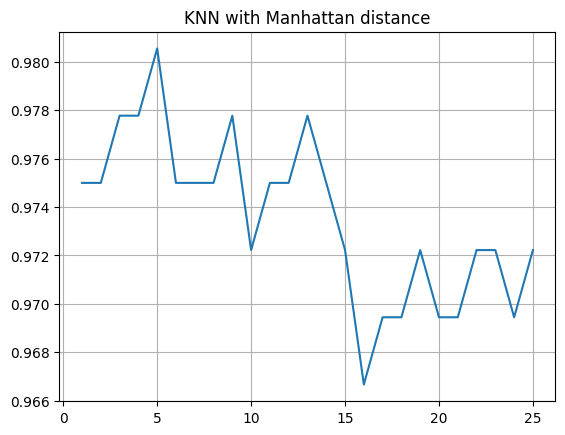

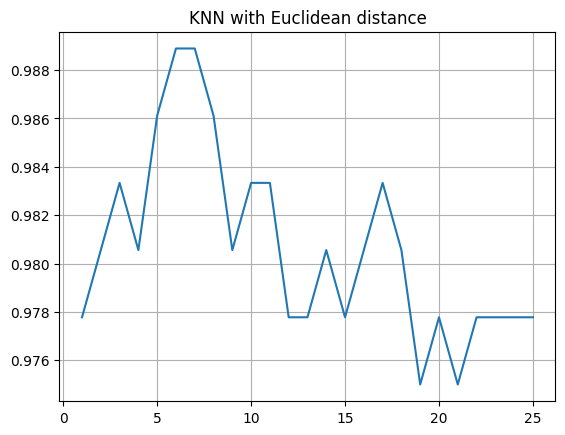

In [3]:
k_range = list(range(1, 26))
mnht_scores = []
ecld_scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors = i, p = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mnht_scores.append(accuracy_score(y_test, y_pred))
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ecld_scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, mnht_scores)
plt.grid(True)
plt.title("KNN with Manhattan distance")
plt.show()
plt.plot(k_range, ecld_scores)
plt.grid(True)
plt.title("KNN with Euclidean distance")
plt.show()

In [4]:
knn = KNeighborsClassifier(n_neighbors = 6, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", recall_score(y_test, y_pred, average = 'macro'))
print("F-score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy:  0.9888888888888889
Precision:  0.9904028005091835
Recall:  0.9899311639549436
F-score:  0.9900986152362391


# Task 3 - Building and Training a Neural Network

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import cv2
from google.colab.patches import cv2_imshow

train_dataset = TensorDataset(torch.tensor(X_train.reshape(X_train.shape[0], 1, 8, 8), dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_test.reshape(X_test.shape[0], 1, 8, 8), dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
# val_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

128
tensor([5, 1, 6, 6, 0, 7, 0, 2, 1, 4, 3, 3, 8, 0, 8, 4, 2, 2, 1, 8, 3, 2, 4, 9,
        4, 8, 3, 8, 9, 0, 2, 7, 9, 0, 0, 9, 6, 8, 0, 1, 1, 5, 3, 3, 5, 7, 4, 5,
        6, 0, 6, 2, 7, 7, 6, 3, 4, 5, 2, 2, 9, 2, 9, 3, 0, 7, 3, 1, 0, 0, 8, 7,
        0, 5, 8, 1, 9, 1, 8, 3, 3, 1, 1, 4, 7, 4, 2, 1, 6, 8, 3, 8, 0, 6, 1, 0,
        5, 2, 1, 9, 9, 0, 5, 3, 9, 6, 7, 6, 6, 6, 7, 3, 3, 8, 7, 0, 8, 2, 7, 1,
        5, 9, 8, 0, 8, 3, 5, 5])
torch.Size([128, 1, 8, 8])
(8, 8)


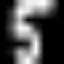

In [7]:
t_data = DataLoader(train_dataset, 128, shuffle=True)
val_data = DataLoader(val_dataset, 128, shuffle=True)

obj = next(iter(t_data))
print(len(obj[1]))
print(obj[1])
print(obj[0].shape)

def show_image(image):
  image = image.numpy().reshape(8,8)
  print(image.shape)
  # image = image.numpy().squeeze()
  image = (image - image.min()) / (image.max() - image.min()) * 255
  image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR)
  cv2_imshow(image)

show_image(obj[0][0])

In [8]:
class PredictMNIST(nn.Module):
  def __init__(self):
    super(PredictMNIST, self).__init__()
    self.c1 = nn.Conv2d(1, 32, 3, 1, 1)
    self.bn1 = nn.BatchNorm2d(32)
    self.c2 = nn.Conv2d(32, 64, 3, 1, 1)
    self.bn2 = nn.BatchNorm2d(64)
    self.dropout = nn.Dropout(0.4)
    self.l1 = nn.Linear(256, 128)
    self.l2 = nn.Linear(128, 10)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, inp):
    inp = self.pool(torch.relu(self.bn1(self.c1(inp))))
    inp = self.pool(torch.relu(self.bn2(self.c2(inp))))
    inp = torch.flatten(inp, 1)
    inp = torch.relu(self.l1(inp))
    inp = self.dropout(inp)
    inp = torch.relu(self.l2(inp))
    return inp


In [9]:
model = PredictMNIST()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
import torch
from tqdm import tqdm

epochs = 20

train_accuracy = []
train_losses = []

val_accuracy = []
val_losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()

    epoch_loss = 0
    correct = 0
    total = 0

    for images, labels in tqdm(t_data):
        # print(images.shape)
        images, labels = images.to(device), labels.to(device)

        o = model(images)
        l = loss(o, labels)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        epoch_loss += l.item()

        _, pred = o.max(1)
        correct += (pred == labels).sum().item()
        total += labels.size(0)

    train_accuracy.append(correct / total)
    train_losses.append(epoch_loss)

    print(f"Train Accuracy: {train_accuracy[-1]:.4f}, Train Loss: {train_losses[-1]:.4f}")

    model.eval()

    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_data):
            images, labels = images.to(device), labels.to(device)

            o = model(images)
            l = loss(o, labels)

            _, pred = o.max(1)

            val_loss += l.item()
            val_correct += (pred == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy.append(val_correct / val_total)
    val_losses.append(val_loss)

    print(f"Val Accuracy: {val_accuracy[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")


100%|██████████| 12/12 [00:00<00:00, 26.06it/s]


Train Accuracy: 0.3243, Train Loss: 24.3817


100%|██████████| 3/3 [00:00<00:00, 86.20it/s]


Val Accuracy: 0.5722, Val Loss: 5.4448


100%|██████████| 12/12 [00:00<00:00, 44.24it/s]


Train Accuracy: 0.6040, Train Loss: 16.9497


100%|██████████| 3/3 [00:00<00:00, 105.62it/s]


Val Accuracy: 0.8917, Val Loss: 3.2996


100%|██████████| 12/12 [00:00<00:00, 46.06it/s]


Train Accuracy: 0.8135, Train Loss: 10.0872


100%|██████████| 3/3 [00:00<00:00, 98.96it/s]


Val Accuracy: 0.9278, Val Loss: 1.6344


100%|██████████| 12/12 [00:00<00:00, 46.48it/s]


Train Accuracy: 0.8984, Train Loss: 5.5034


100%|██████████| 3/3 [00:00<00:00, 111.57it/s]


Val Accuracy: 0.9333, Val Loss: 0.8686


100%|██████████| 12/12 [00:00<00:00, 44.15it/s]


Train Accuracy: 0.9388, Train Loss: 3.3592


100%|██████████| 3/3 [00:00<00:00, 79.65it/s]


Val Accuracy: 0.9611, Val Loss: 0.5234


100%|██████████| 12/12 [00:00<00:00, 50.14it/s]


Train Accuracy: 0.9596, Train Loss: 2.2356


100%|██████████| 3/3 [00:00<00:00, 107.51it/s]


Val Accuracy: 0.9583, Val Loss: 0.3828


100%|██████████| 12/12 [00:00<00:00, 48.58it/s]


Train Accuracy: 0.9743, Train Loss: 1.6502


100%|██████████| 3/3 [00:00<00:00, 112.12it/s]


Val Accuracy: 0.9833, Val Loss: 0.2380


100%|██████████| 12/12 [00:00<00:00, 44.68it/s]


Train Accuracy: 0.9777, Train Loss: 1.1772


100%|██████████| 3/3 [00:00<00:00, 103.36it/s]


Val Accuracy: 0.9806, Val Loss: 0.2008


100%|██████████| 12/12 [00:00<00:00, 46.20it/s]


Train Accuracy: 0.9847, Train Loss: 0.9367


100%|██████████| 3/3 [00:00<00:00, 106.71it/s]


Val Accuracy: 0.9944, Val Loss: 0.1564


100%|██████████| 12/12 [00:00<00:00, 43.20it/s]


Train Accuracy: 0.9882, Train Loss: 0.7730


100%|██████████| 3/3 [00:00<00:00, 77.77it/s]


Val Accuracy: 0.9917, Val Loss: 0.1307


100%|██████████| 12/12 [00:00<00:00, 39.59it/s]


Train Accuracy: 0.9944, Train Loss: 0.4942


100%|██████████| 3/3 [00:00<00:00, 104.24it/s]


Val Accuracy: 0.9972, Val Loss: 0.1105


100%|██████████| 12/12 [00:00<00:00, 46.46it/s]


Train Accuracy: 0.9916, Train Loss: 0.5513


100%|██████████| 3/3 [00:00<00:00, 104.27it/s]


Val Accuracy: 0.9889, Val Loss: 0.1161


100%|██████████| 12/12 [00:00<00:00, 46.94it/s]


Train Accuracy: 0.9937, Train Loss: 0.4601


100%|██████████| 3/3 [00:00<00:00, 100.18it/s]


Val Accuracy: 0.9944, Val Loss: 0.0908


100%|██████████| 12/12 [00:00<00:00, 48.93it/s]


Train Accuracy: 0.9944, Train Loss: 0.4460


100%|██████████| 3/3 [00:00<00:00, 105.22it/s]


Val Accuracy: 0.9917, Val Loss: 0.1204


100%|██████████| 12/12 [00:00<00:00, 44.33it/s]


Train Accuracy: 0.9916, Train Loss: 0.4051


100%|██████████| 3/3 [00:00<00:00, 107.88it/s]


Val Accuracy: 0.9944, Val Loss: 0.0834


100%|██████████| 12/12 [00:00<00:00, 45.28it/s]


Train Accuracy: 0.9979, Train Loss: 0.2923


100%|██████████| 3/3 [00:00<00:00, 108.58it/s]


Val Accuracy: 0.9944, Val Loss: 0.0888


100%|██████████| 12/12 [00:00<00:00, 47.34it/s]


Train Accuracy: 0.9979, Train Loss: 0.2453


100%|██████████| 3/3 [00:00<00:00, 114.37it/s]


Val Accuracy: 0.9944, Val Loss: 0.0748


100%|██████████| 12/12 [00:00<00:00, 46.50it/s]


Train Accuracy: 0.9986, Train Loss: 0.1986


100%|██████████| 3/3 [00:00<00:00, 101.19it/s]


Val Accuracy: 0.9944, Val Loss: 0.0575


100%|██████████| 12/12 [00:00<00:00, 45.91it/s]


Train Accuracy: 0.9979, Train Loss: 0.1884


100%|██████████| 3/3 [00:00<00:00, 108.49it/s]


Val Accuracy: 0.9944, Val Loss: 0.0566


100%|██████████| 12/12 [00:00<00:00, 48.13it/s]


Train Accuracy: 0.9986, Train Loss: 0.1681


100%|██████████| 3/3 [00:00<00:00, 119.72it/s]

Val Accuracy: 0.9972, Val Loss: 0.0627


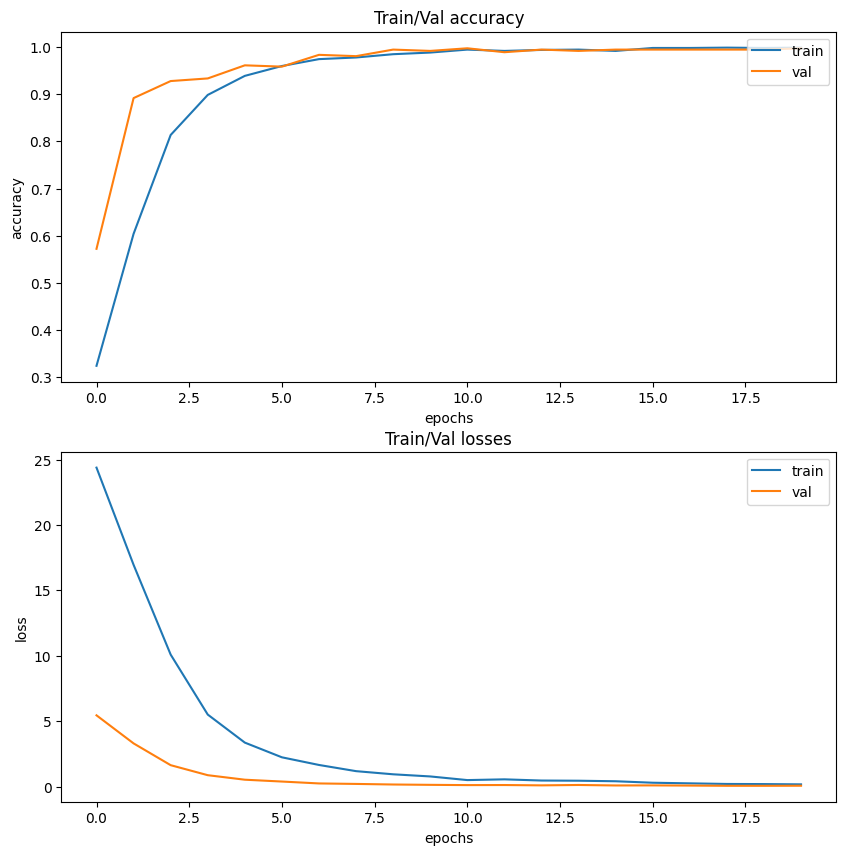

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(range(epochs), train_accuracy, label="train")
ax[0].plot(range(epochs), val_accuracy, label="val")
ax[0].title.set_text("Train/Val accuracy")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accuracy")
ax[0].legend(loc="upper right")

ax[1].plot(range(epochs), train_losses, label="train")
ax[1].plot(range(epochs), val_losses, label="val")
ax[1].title.set_text("Train/Val losses")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("loss")
ax[1].legend()

# Task 4 - Comparative Analysis of Models